# SYSC4906 Introduction to Machine Learning
## Assignment 1
|**Martin Klamrowski** | **#**|
|-----------------|-------------------|

# Question 1
### i)
$$ 
\nabla f(x,y,z)= \begin{cases}
{\delta{} \over \delta{x}} x^3z - 2xy^2 + 5z \\
{\delta{} \over \delta{y}} x^3z - 2xy^2 + 5z \\
{\delta{} \over \delta{z}} x^3z - 2xy^2 + 5z
\end{cases}
$$

$$ \nabla f(x,y,z)= [2x^2z - 2y^2, -4xy, x^3 + 5] $$

$$ \nabla f(-3,-2,1)= [10, -24, -22] $$

### ii)  
The gradient is just the derivative of a multivariable function. It defines a vector field where the vectors point in the direction of greatest increase. The vector [10, -24, -22], given by computing the value of the gradient from part i), is a vector pointing in the direction of greatest increase relative to the point (-3, -2, 1).  

# Question 2
## 2.1.  

The expected value of the sample is the mean, which is: $\mu_S = {1+4+4+3+4+3+1+3+2+3 \over 10} = 2.8$
        
Since there's no PMF, I'm assuming that every value is equiprobable. The variance can then be computed with the following equation:
$$S^2 = {1 \over n - 1}\sum_{i=1}^{n}{(x_i - \mu_S)^2}$$
$n - 1$ is used instead of $n$ when computing sample variance. $\mu_S$, from part 1., is considered an unbiased estimator[1].
    
$$S^2 = {1 \over 10 - 1}[(1 - 2.8)^2 + (4 - 2.8)^2 ...] $$

$$S^2 = 1.2889$$
    
The standard deviation $S$ of the sample is just the square root of the variance from above: $S = 1.1353$        
    

## 2.2.  
The sum of all probabilities in a given PMF must equal 1. Therefore: $\text{Pr}(2) = 1 - 0.2 - 0.3 - 0.3 - 0.05 = 0.15$

## 2.3.  
The expectation of a discrete random variable $x$ is given by the equation:
$$E[x] \stackrel{\text{def}}{=} \sum_{i=1}^{k}{[x_i\text{Pr}(x = x_i)]}$$

$$E[x] = [(1)(0.2) + (2)(0.15) + (3)(0.3) + (4)(0.3) + (5)(0.05)]$$

$$E[x] = 2.85$$

The variance for the same PMF is defined as follows:
$$\sigma^2 \stackrel{\text{def}}{=} \sum_{i=1}^{k}{[x_i\text{Pr}(x = x_i)(x_i - \mu)^2]}$$

$$\sigma^2 = [(1)(0.2)(1 - 2.85)^2 + (2)(0.15)(2 - 2.85)^2 + (3)(0.3)(3 - 2.85)^2 + (4)(0.3)(4 - 2.85)^2 + (5)(0.05)(5 - 2.85)^2]$$

$$\sigma^2 = 3.6641$$


## 2.4.  

$$\text{Pr}(+) = \sum_{i=1}^{5}{\text{Pr}(x_i)\text{Pr}(+|x_i)}$$

$$\text{Pr}(+) = (0.2)(0.1) + (0.15)(0.15) + (0.3)(0.2) + (0.3)(0.4) + (0.05)(0.7)$$

$$\text{Pr}(+) = 0.2575$$

Using Baye's Rule, the $\text{Pr}(5|-)$ can be found as follows:

$$\text{Pr}(5|-) = {{\text{Pr}(-|5)\text{Pr}(5)} \over \text{Pr}(-)}$$

$\text{Pr}(-) = \text{Pr}(+)^C$ and $\text{Pr}(-|5) = \text{Pr}(+|5)^C$. Plugging in values:

$$\text{Pr}(5|-) = {{(1 - 0.7)(0.05)} \over 1 - 0.2575}$$

$$\text{Pr}(5|-) = 0.0202$$

# Question 3

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## a)

The dataset is loaded into a dataframe, from which features and labels are loaded into their own respective dataframes.

In [2]:
data = pd.read_csv("heart.csv")
df = pd.DataFrame(data, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

features = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
labels = df[['target']]

The data is split (75% train, 25% test), using stratified sampling, shown below.

In [3]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features, labels, train_size=0.75, random_state=0, stratify=labels)

## b)

A logistic regression classifier (from sklearn) is then trained using the created x_train and y_train dataframes from a).

In [4]:
logistic_reg1 = LogisticRegression()
logistic_reg1.fit(x_train1, y_train1)

C:\Users\MK\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

With the model trained, predictions can be made on our testing set. The predicted values are then compared to the actual values to generate an accuracy score.

In [5]:
y_pred1 = logistic_reg1.predict(x_test1)
print("An accuracy of {:.2f} was achieved.".format(sk.metrics.accuracy_score(y_test1, y_pred1)))

An accuracy of 0.88 was achieved.


Note: increasing max_iter to 1000 gives an accuracy of ~85%, vs. ~88% when run without.

## c)
b) will be repeated, but this time only the 'age' and 'trestbps' columns/features will be used to train the model. 

In [6]:
features2 = features[['age', 'trestbps']]

x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, labels, train_size=0.75, random_state=0, stratify=labels)

logistic_reg2 = LogisticRegression().fit(x_train2, y_train2)

y_pred2 = logistic_reg2.predict(x_test2)
print("The accuracy of the above model was {:.2f}.".format(sk.metrics.accuracy_score(y_test2, y_pred2)))

The accuracy of the above model was 0.63.


C:\Users\MK\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


As can be seen above, the accuracy of the classifier was quite dramatically affected by the exclusion of certain features. Atleast some of those features were relevant to correctly labelling each example. An accuracy of 63% is almost useless.

## d)

[(69.0, 217.0),
 Text(0, 0.5, 'trestbps'),
 (9.0, 102.0),
 Text(0.5, 0, 'age'),
 Text(0.5, 1.0, 'Test Data'),
 None]

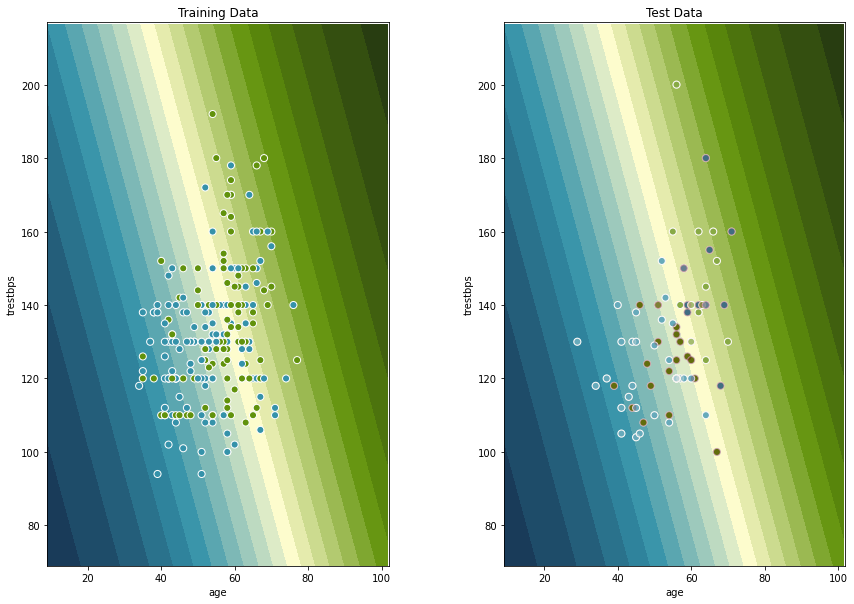

In [7]:
from palettable.cmocean.diverging import Delta_5_r

# determining ranges for plot axes
x_min, x_max = x_train2['age'].min() - 25, x_train2['age'].max() + 25
y_min, y_max = x_train2['trestbps'].min() - 25, x_train2['trestbps'].max() + 25

# creating a grid and calculating probabilities for all points on that grid
xx, yy = np.mgrid[x_min:x_max:0.5, y_min:y_max:0.5]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logistic_reg2.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, plots = plt.subplots(1, 2, figsize=(15, 10))

### FIRST PLOT ###
# drawing decision boundaries
plots[0].contourf(xx, yy, probs, 25, cmap=Delta_5_r.mpl_colormap, vmin=0, vmax=1)

# drawing examples
plots[0].scatter(x_train2['age'], x_train2['trestbps'], c=y_train2['target'], 
                 s=50, cmap=ListedColormap(['#61920c', '#3592aa']), vmin=-0.2, vmax=1.2, edgecolor='white', linewidth=1)

plots[0].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel='age', ylabel='trestbps', title="Training Data")

### SECOND PLOT ###
# drawing decision boundaries
plots[1].contourf(xx, yy, probs, 25, cmap=Delta_5_r.mpl_colormap, vmin=0, vmax=1)

# drawing examples
plots[1].scatter(x_test2['age'], x_test2['trestbps'], c=y_test2['target'], 
                 s=50, cmap=ListedColormap(['#61920c', '#3592aa']), vmin=-0.2, vmax=1.2, edgecolor='white', linewidth=1)

# drawing red highlights of misclassified examples
df_correct = pd.DataFrame(y_test2.values!=pd.DataFrame(y_pred2).values)
plots[1].scatter(x_test2['age'], x_test2['trestbps'], c=df_correct[0],
                 s=50, cmap='Reds', alpha=0.25)

plots[1].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel='age', ylabel='trestbps', title="Test Data")

Plots with decision boundaries and examples are shown above. The examples are color coded based on their class (blue for 1, green for 0). The decision boundary is given by the white line. Each layer around the white line represents the probability that an example at that point is of a given class. The plot on the right shows examples that were misclassified by the logistic regression classifier. The results make sense, i.e. green examples in the blue area are marked red, and vice-versa. The reason for 63% accuracy is also evident from both plots, as the examples are not linearly separable using this particular pair of features. Visually, there does appear to be a very slight trend, with blue points trending towards a lower trestbps and age, but there are too many green points mixed in as well. This trend is also less significant considering there are about 17% more blue examples than green examples in the dataset.

# Question 4

## 4.1.
Data is loaded and plotted below.

Text(0.5, 1.0, 'Some Data')

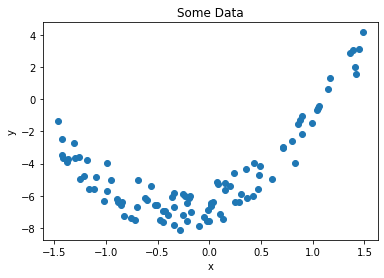

In [8]:
data = pd.read_csv("Assig1Q3.csv", header=None) # there are no column headers

x, y = data[0], data[1]
x_sorted = x.sort_values() # need to do this so matplotlib draws a line/curve and not a spider web

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Some Data")

## 4.2.

A linear model is given by the equation $y = wx + b$. The parameters $w$ and $b$ will be estimated using the $\beta$ function, which provides an estimate for some set of linear coefficients given the feature vector and corresponding labels. There's a fancy proof for this but it would take up too much space and finger stamina. The $\beta$ function is given below: 

$$\beta = (X^TX)^{-1}X^Ty)$$

$X$ is the augmented feature vector.

In [9]:
# beta formula
def beta_function(av_x, v_y): return np.matmul(np.linalg.inv(np.matmul(av_x.T, av_x)), 
                                               np.matmul(av_x.T, v_y.to_numpy()))

# mse formula
def mse_function(av_x, v_y, beta): return np.sum((v_y - np.dot(av_x, beta)) ** 2) / v_y.size

# augmented feature vector
aug1_x = np.c_[x, [1 for i in range(x.size)]]

# our parameters w and b
w, b = beta_function(aug1_x, y)
print("beta: [w -> {}, b -> {}]".format(w, b))

beta: [w -> 1.9098720420505155, b -> -4.460975471665963]


## 4.3. & 4.4.

Now it's time to plug everything into the objective function ($y = wx + b$). To plot the line of best fit, the objective function will be computed at every point in $x$.

Text(0.5, 1.0, 'Some Data with a Line of Best Fit')

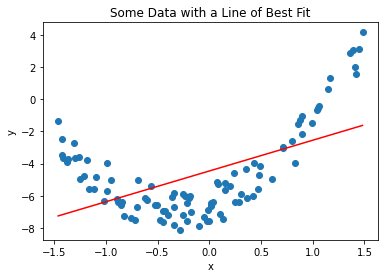

In [10]:
# drawing
plt.scatter(x, y)
plt.plot(x_sorted, [(w * xi) + b for xi in x_sorted], c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Some Data with a Line of Best Fit")

## 4.5.

Visually, the line of best fit shown in part 4.4. above makes sense. The $MSE(\beta)$ is computed using the equation:
$$MSE(\beta) = \sum_{i=1}^{n}{(y−x\beta)^2}$$
Where $x$ and $y$ are the augmented feature and label vectors respectively.

In [11]:
mse1 = mse_function(aug1_x, y, (w, b))
print("MSE1 = {}".format(mse1))

MSE1 = 5.403948277421325


## 4.6.

A quadratic model is given by the equation $y = ax^2 + bx + c$.

beta: [a -> 3.2370449799074255, b -> 2.1672533520196375, c -> -6.534142400784004]
MSE2 -> 0.56831374489067


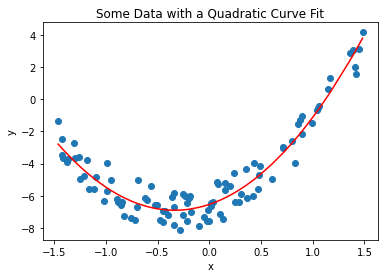

In [12]:
# augmenting the feature vector
aug2_x = np.c_[x ** 2, x, [1 for i in range(x.size)]]

# our parameters a, b, c
a, b, c = beta_function(aug2_x, y)

# drawing
plt.scatter(x, y)
plt.plot(x_sorted, [a*xi**2 + b*xi + c for xi in x_sorted], c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Some Data with a Quadratic Curve Fit")
print("beta: [a -> {}, b -> {}, c -> {}]".format(a, b, c))
print("MSE2 -> {}".format(mse_function(aug2_x, y, (a, b, c))))

## 4.7.

The linear regression using the quadratic model is the better fit (has a lower MSE), and therefore would be the better predictor for this data.

## 4.8.

The relationship between variables is non-linear, in this case $x$ and $y$. However, so long as the coefficients describing the functional form of the thing being estimated are linear, linear regression can be applied. More specifically, our coefficients ($\beta$) are linear, and so this is a linear regression.

# Question 5

## 5.1.

In this section, clusters of data will be generated with varying amounts of noise. There will be a cluster of points for each of two classes. An attempt will be made using SVMs to train a model to classify the points in each noise level. The four datasets containing different noise levels are generated and drawn below.

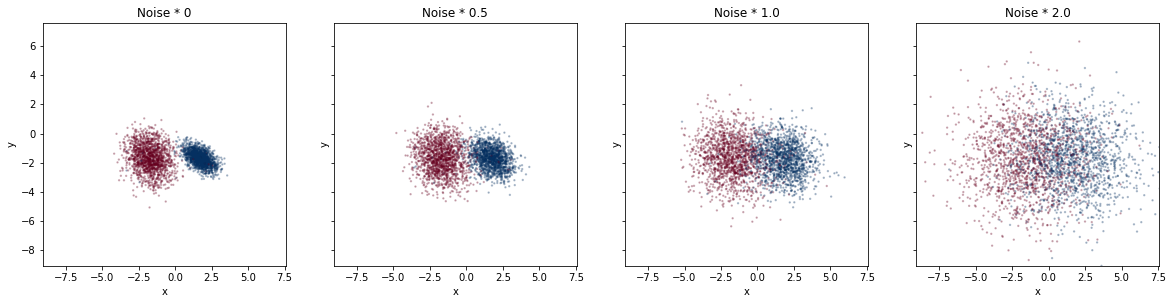

In [13]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# making the data
x, y = make_classification(n_samples=3000, n_features=2, n_redundant=0, random_state=5, class_sep=1.7, n_clusters_per_class=1)

# determining plot boundaries
x_min, x_max = x.min() - 4, x.max() + 4
y_min, y_max = x_min, x_max

# noise stuff
rng = np.random.RandomState(8008)
noisii = ("Noise * 0", "Noise * 0.5", "Noise * 1.0", "Noise * 2.0")

fig, plots = plt.subplots(1, 4, figsize=(20, 10), sharey=True)

# drawing a plot with varying levels of noise as determined by the random noise generator
for i, (noise, ds) in enumerate(zip(noisii, (x, 
                                             x + 0.5 * rng.normal(size=x.shape),
                                             x + rng.normal(size=x.shape),
                                             x + 2.0 * rng.normal(size=x.shape)))):
    
    plots[i].scatter(ds[:, 0], ds[:, 1], c=y, cmap='RdBu', alpha=0.25, s=2)
    plots[i].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel='x', ylabel='y', title=noise)

## 5.2. & 5.3.

SVMs are trained on each dataset displayed in part 5.1. The accuracy of each model is then reported.

In [14]:
for noise, ds in zip(noisii, (x,
                              x + 0.5 * rng.normal(size=x.shape),
                              x + rng.normal(size=x.shape),
                              x + 2.0 * rng.normal(size=x.shape))):
    
    x_train, x_test, y_train, y_test = train_test_split(ds, y, train_size=0.70, stratify=y)
    clf = SVC(kernel='poly', degree=2, C=1, gamma='auto').fit(x_train, y_train)
    print("Accuracy of {} classifier is {:.2f}".format(noise, clf.score(x_test, y_test)))

Accuracy of Noise * 0 classifier is 0.99
Accuracy of Noise * 0.5 classifier is 0.96
Accuracy of Noise * 1.0 classifier is 0.85
Accuracy of Noise * 2.0 classifier is 0.65


The accuracy of each classifier degrades as the noise is increased. The reasons as to why are best visualized in the figures from part 5.1. As noise is increased, the clusters become less linearly separable and thus the classifier has a harder time.

## 5.4.

Varying the hyperparameter C has an effect on the classifier, as will be demonstrated below.

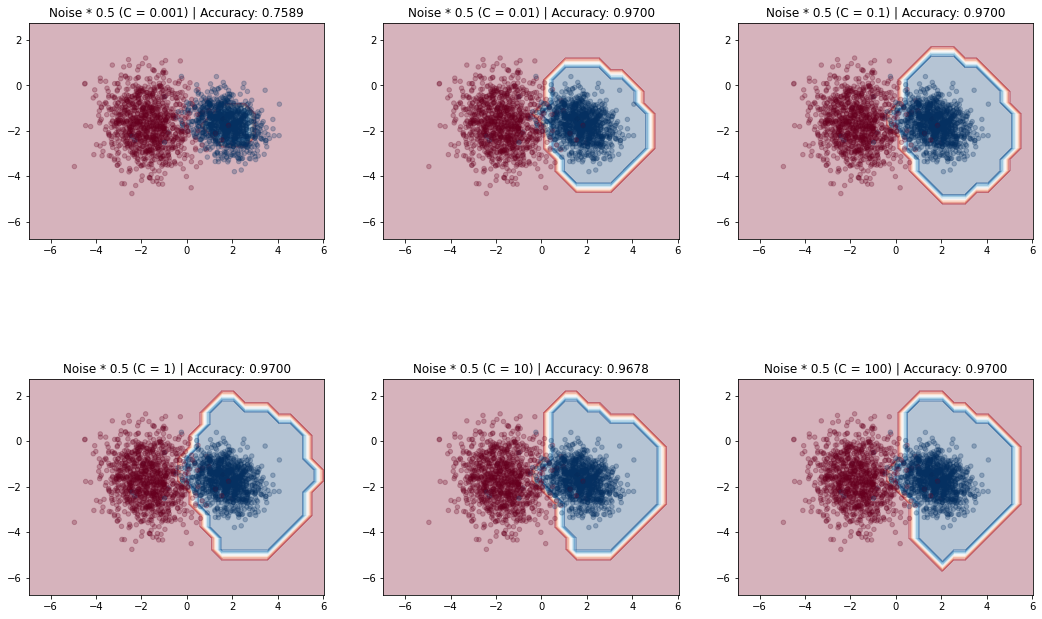

In [15]:
# taking samples
x_train, x_test, y_train, y_test = train_test_split(x + 0.5 * rng.normal(size=x.shape), y, train_size=0.70, stratify=y)

# determining ranges for plot axes
x_min, x_max = x_train[:, 0].min() - 2, x_train[:, 0].max() + 2
y_min, y_max = x_train[:, 1].min() - 2, x_train[:, 1].max() + 2

# creating a grid and calculating probabilities for all points on that grid
xx, yy = np.mgrid[x_min:x_max:0.5, y_min:y_max:0.5]
grid = np.c_[xx.ravel(), yy.ravel()]

fig = plt.figure(figsize=(18, 12))

# training on different C's, finding accuracies, drawing results
for i, c in enumerate((0.001, 0.01, 0.1, 1, 10, 100)):    
    clf = SVC(C=c, gamma='auto').fit(x_train, y_train)
    probs = clf.predict(grid).reshape(xx.shape)
    accuracy = sk.metrics.accuracy_score(y_test, clf.predict(x_test))
    
    subplot = plt.subplot(2, 3, i + 1)
    subplot.contourf(xx, yy, probs, 20, cmap='RdBu', alpha=0.3)
    subplot.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='RdBu', alpha=0.25, s=20)
    subplot.set(aspect='equal', title="Noise * 0.5 (C = {}) | Accuracy: {:.4f}".format(c, accuracy))

C controls the penalty issued when a classifier makes a mistake during training. In sklearn, C determines how strong the regularization will be. Regularization is a technique for discouraging a model from becoming more complex. The strength of the regularization is inversely proportional to C, so higher C's mean more complex models with "unsmooth" decision boundaries, and a greater risk of overfitting. 

This can be seen in the 6 figures above. In the first (C=0.001), the strength of the regularization is the highest, and so the model attempts to become as simple as possible. This leads to poor accuracy and would therefore not be preferable. Inversely, in the last figure (C=100), the algorithm is penalized largely for misclassifying examples, resulting in jagged decision boundaries and potentially separate/isolated decision areas to accomodate single points. The second figure (C=0.01) appears to do the job the best, with high accuracy and simple decision boundaries, so the risk of overfitting is low. 